In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb

mnist= tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images/255, test_images/255

# for i in range(6):
#   plt.subplot(2,3,i+1)
#   plt.imshow(train_images[i],cmap='gray')
# plt.show()

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

2023-03-28 22:00:51.944913: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-28 22:00:51.947462: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/maven/3.6.3/lib
2023-03-28 22:00:51.947474: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
model=tf.keras.models.Sequential()

model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(1000,activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


2023-03-28 22:00:56.350863: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/maven/3.6.3/lib
2023-03-28 22:00:56.350881: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-28 22:00:56.350889: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dover): /proc/driver/nvidia/version does not exist
2023-03-28 22:00:56.351024: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from keras import optimizers
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=10
batchSize=64

model.compile(loss=loss,optimizer=optim,metrics=metrics)
model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,shuffle=True)

Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2048 - accuracy: 0.9399
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0792 - accuracy: 0.9763
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0515 - accuracy: 0.9838
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0351 - accuracy: 0.9890
Epoch 5/10
938/938 [==============================] - 1s 948us/step - loss: 0.0233 - accuracy: 0.9930
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0201 - accuracy: 0.9937
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0150 - accuracy: 0.9951
Epoch 8/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0121 - accuracy: 0.9962
Epoch 9/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0128 - accuracy: 0.9955
Epoch 10/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0089 - accuracy: 0.99

In [4]:
model.evaluate(test_images,test_labels,batch_size=batchSize)



157/157 [==============================] - 0s 737us/step - loss: 0.0706 - accuracy: 0.9837


[0.07063379138708115, 0.9836999773979187]

Prediction :  4


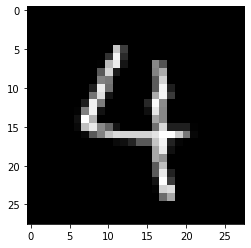

In [5]:
import numpy as np

#prediction time
pred_model= tf.keras.models.Sequential();
pred_model.add(model)
pred_model.add(layers.Softmax())


cnt =random.randint(100)

predictions=pred_model(test_images)
pred0=predictions[cnt]
label0=np.argmax(pred0) #agrmax finds max in the array passed .here aray is pred0

# print(pred0)
plt.imshow(test_images[cnt],cmap='gray')
print("Prediction : ",label0)


313/313 [==============================] - 0s 391us/step


<AxesSubplot:>

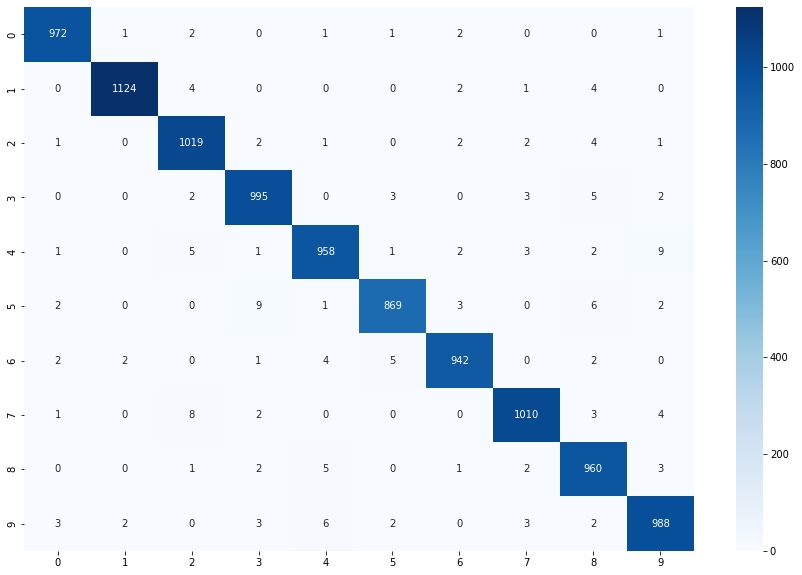

In [6]:
y_pred = np.argmax(pred_model.predict(test_images), axis=1)
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

conf_matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), columns=labels, index=labels)
plt.figure(figsize=(15,10))  
sb.heatmap(conf_matrix, annot=True, fmt="d",cmap="Blues")